# GDELT 1.0 Event  database

# Info

This notebook performs a basic inspection of the GDELT event file. Please refer to `documentation/GDELT_1.0_EVENTS.md` for a brief overview of the structure of the files. Or the [full documentaiton provided by the creators of the database.](http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf)

# Download data

Individual files for a single day are in the order of **megabytes** therefore can be explored locally, on a user machine, without the need of a cluster or distributed spark solutions.

Download an example of one day's recording of events:

In [1]:
!mkdir -p tmp_data
!wget http://data.gdeltproject.org/events/20200411.export.CSV.zip -O tmp_data/20200411.export.CSV.zip
!unzip -o tmp_data/20200411.export.CSV.zip -d tmp_data/ 
!rm tmp_data/20200411.export.CSV.zip

--2020-04-17 12:01:30--  http://data.gdeltproject.org/events/20200411.export.CSV.zip
Resolving data.gdeltproject.org... 172.217.11.16, 2607:f8b0:4006:818::2010
Connecting to data.gdeltproject.org|172.217.11.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5751983 (5.5M) [application/zip]
Saving to: ‘tmp_data/20200411.export.CSV.zip’

tmp_data/20200411.e 100%[===================>]   5.49M  12.0MB/s    in 0.5s    

2020-04-17 12:01:31 (12.0 MB/s) - ‘tmp_data/20200411.export.CSV.zip’ saved [5751983/5751983]

Archive:  tmp_data/20200411.export.CSV.zip
  inflating: tmp_data/20200411.export.CSV  


In [2]:
!mkdir -p tmp_data
!wget http://data.gdeltproject.org/events/20200330.export.CSV.zip -O tmp_data/20200330.export.CSV.zip
!unzip -o tmp_data/20200330.export.CSV.zip -d tmp_data/ 
!rm tmp_data/20200330.export.CSV.zip

--2020-04-17 12:01:31--  http://data.gdeltproject.org/events/20200330.export.CSV.zip
Resolving data.gdeltproject.org... 172.217.11.16, 2607:f8b0:4006:818::2010
Connecting to data.gdeltproject.org|172.217.11.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9132372 (8.7M) [application/zip]
Saving to: ‘tmp_data/20200330.export.CSV.zip’

tmp_data/20200330.e 100%[===================>]   8.71M  13.0MB/s    in 0.7s    

2020-04-17 12:01:32 (13.0 MB/s) - ‘tmp_data/20200330.export.CSV.zip’ saved [9132372/9132372]

Archive:  tmp_data/20200330.export.CSV.zip
  inflating: tmp_data/20200330.export.CSV  


Download appropriate header name. See the above link and references explaining these header names, its meaning and types.

In [3]:
!wget https://www.gdeltproject.org/data/lookups/CSV.header.dailyupdates.txt -O tmp_data/gdelt_headers.txt

--2020-04-17 12:01:33--  https://www.gdeltproject.org/data/lookups/CSV.header.dailyupdates.txt
Resolving www.gdeltproject.org... 66.96.149.28
Connecting to www.gdeltproject.org|66.96.149.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 893 [text/plain]
Saving to: ‘tmp_data/gdelt_headers.txt’

tmp_data/gdelt_head 100%[===================>]     893  --.-KB/s    in 0s      

2020-04-17 12:01:33 (89.3 MB/s) - ‘tmp_data/gdelt_headers.txt’ saved [893/893]



# Load data

**Note** although the files is in **CSV** (comma-separated values), they are in reality separated by tabulature ('\t'):


In [4]:
! head -n 1 tmp_data/20200411.export.CSV

917582621	20190412	201904	2019	2019.2795											GOV	PRESIDENT						GOV			1	120	120	12	3	-4.0	144	24	144	-2.57372688946666	0							2	Oregon, United States	US	USOR	44.5672	-122.127	OR	2	Oregon, United States	US	USOR	44.5672	-122.127	OR	20200411	https://www.wvnn.com/news/watchdog-finds-treasury-acted-properly-in-denying-request-for-trump-tax-returns/


In [5]:
import pandas as pd

# Load data
tmp1 = pd.read_csv("tmp_data/20200411.export.CSV", sep='\t', header=None)
tmp2 = pd.read_csv("tmp_data/20200330.export.CSV", sep='\t', header=None)

data = pd.concat([tmp1,tmp2])
del tmp1, tmp2


# Load headers
f = open('tmp_data/gdelt_headers.txt', 'r')
headers = f.readline()
headers = headers.split("\t")
headers = [x.strip() for x in headers]

f.close()

# Test
assert len(headers)== len(data.columns)

# Inject headers names
data.columns = headers

# Show
pd.set_option('display.max_columns', None)
data.head(2000)

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,917582621,20190412,201904,2019,2019.2795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOV,PRESIDENT,NaN,NaN,NaN,NaN,NaN,GOV,NaN,NaN,1,120,120,12,3,-4.0,144,24,144,-2.573727,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"Oregon, United States",US,USOR,44.5672,-122.1270,OR,2,"Oregon, United States",US,USOR,44.5672,-122.1270,OR,20200411,https://www.wvnn.com/news/watchdog-finds-treas...
1,917582622,20190412,201904,2019,2019.2795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,43,43,4,1,2.8,24,1,24,-0.440529,0,NaN,NaN,NaN,NaN,NaN,NaN,3,"Tempe, Arizona, United States",US,USAZ,33.4148,-111.9090,12233,2,"Arizona, United States",US,USAZ,33.7712,-111.3880,AZ,20200411,https://mix969.iheart.com/content/2020-04-10-p...
2,917582623,20190412,201904,2019,2019.2795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NEW YORK CITY,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,46,46,4,1,7.0,6,1,6,2.277904,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"New York, United States",US,USNY,42.1497,-74.9384,NY,2,"New Jersey, United States",US,USNJ,40.3140,-74.5089,NJ,20200411,https://www.inquisitr.com/5991406/leah-mcsween...
3,917582624,20190412,201904,2019,2019.2795,GOV,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,GOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20,20,2,1,3.0,10,5,10,-0.436962,2,"New York, United States",US,USNY,42.149700,-74.938400,NY,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"Illinois, United States",US,USIL,40.3363,-89.0022,IL,20200411,https://thesouthern.com/news/state-and-regiona...
4,917582625,20190412,201904,2019,2019.2795,USA,WASHINGTON,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,10,1,1,0.0,2,1,2,-3.125000,1,Lebanon,LE,LE,33.833333,35.833333,LE,0,NaN,NaN,NaN,NaN,NaN,NaN,3,"Washington, District of Columbia, United States",US,USDC,38.8951,-77.0364,531871,20200411,https://www.middleeasteye.net/news/us-offers-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,917584616,20200411,202004,2020,2020.2767,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10,10,1,1,0.0,16,4,16,-0.654578,3,"Portland, Oregon, United States",US,USOR,45.523500,-122.676000,1136645,0,NaN,NaN,NaN,NaN,NaN,NaN,3,"Portland, Oregon, United States",US,USOR,45.5235,-122.6760,1136645,20200411,http://www.sealynews.com/stories/a-laredo-er-s...
1996,917584617,20200411,202004,2020,2020.2767,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,10,1,1,0.0,4,1,4,1.421801,3,"Fishtown, Pennsylvania, United States",US,USPA,39.965100,-75.135500,1202851,0,NaN,NaN,NaN,NaN,NaN,NaN,3,"Fishtown, Pennsylvania, United States",US,USPA,39.9651,-75.1355,1202851,20200411,https://www.phillyvoice.com/fishtown-brewery-s...
1997,917584618,20200411,202004,2020,2020.2767,USA,UNITED STATES,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,10,1,1,0.0,18,6,18,-0.691560,3,"Dallas, Texas, United States",US,USTX,32.783100,-96.8067

# EDA
Basic Exploratory Data Analysis for the purpose of **data cleaning** is relevant to task at hand. Focus is put on data consistency, and building intuition for upcoming data sets.

Below tests can be easily done in Pandas environment, but serve here as a skeleton for later automated checks in SQL and Apache Airflow.

## Case #1: Missing data

At this stage of modelling we know that there shouldn't be any duplicated in event IDs.

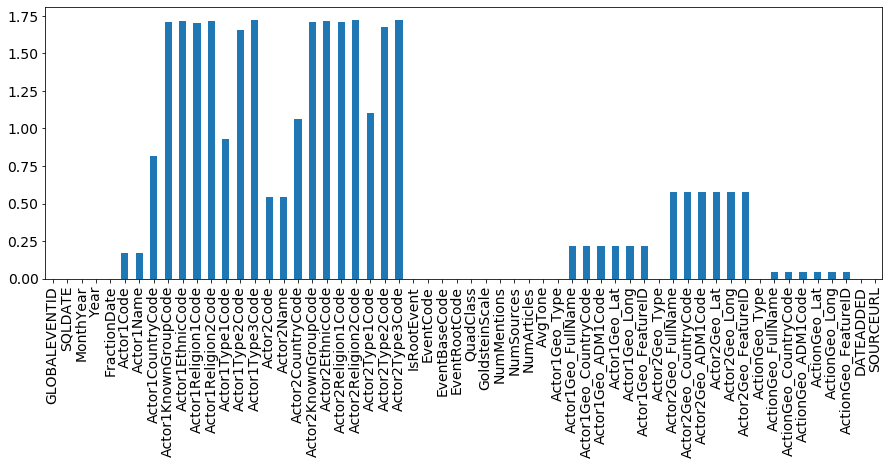

In [6]:
# How many NA values we have per column in % PERCENTAGES


import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,5))
NAs_per_column = data.isna().sum()
NAs_per_column_norm = NAs_per_column*100/data.size
NAs_per_column_norm.plot(kind='bar',logy=False)

ax.tick_params(axis='both', which='major', labelsize=14)
 

#NAs_per_column.plot(kind='bar',logy=True)

Majority of entries have all values present, alhough also majority of columns have **some values** missing. 

We'll store **all information** present that has unique `GLOBALEVENTID` for a given `SQLDATE`:

## Case #2: Duplicates

In [7]:
# Basic check
    # No entry should be duplicated
assert data[data.duplicated()].size==0

In [8]:
# less general basic check: 
    # no global event ID should be duplicated (for a given date)
assert data[data.duplicated(['GLOBALEVENTID','SQLDATE'])].size == 0